# Question 4

### Sample Statistics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mt_prng as mt
import collections

%matplotlib inline
s = mt.mt_seed(5489)

In [10]:
df = pd.read_csv('yearly_sales.csv')   #Reading the csv file
df.head()                             #Displaying the first 5 rows

,cust_id,sales_total,num_of_orders,gender
0,100001,800.64,3,F
1,100002,217.53,3,F
2,100003,74.58,2,M
3,100004,498.60,3,M
4,100005,723.11,4,F


In [3]:
df.describe()          #Describing the data

,cust_id,sales_total,num_of_orders
count,10000.00000,10000.000000,10000.000000
mean,105000.50000,249.455676,2.428000
std,2886.89568,319.050782,1.441119
min,100001.00000,30.020000,1.000000
25%,102500.75000,80.292500,2.000000
50%,105000.50000,151.650000,2.000000
75%,107500.25000,295.502500,3.000000
max,110000.00000,7606.090000,22.000000


#### Mean of the population  : 249.455676
#### Variance of the population : 101,793.401494
#### Standard deviation of the population : 319.050782

In [21]:
'''Calculating Sample Mean and Sample Variance without replacement of samples of size 1000'''
'''Note -- It should be done essentially with replacement but I could not work out the code for it. Filter removes duplicates
So I had to it without replacement. Since we are trying to prove a theoretical concept and choosing 1 customer does not 
affect the probability of choosing 2nd customer, it should be done with replacement'''

x_bar_list =[]
sample_var_list=[]
for i in range(700):       #Generating samples of size 1000, 700 times
    sam_var_temp=0
    sample_id = mt.mt_choice(df['cust_id'], size=1000, replace = False)   #Choosing samples without replacement
    filt = df['cust_id'].isin(sample_id)          #Filter to show only chosen samples
    x_i = df.loc[filt, 'sales_total']
    x_bar = x_i.sum()/1000                        #Calculating Sample Mean
    x_bar_list.append(x_bar)                      #Appending sample mean for first sample in the list---x_bar_list
    for x in x_i:                                 #Calculating Sample variance
        sam_var_temp+= (x-x_bar)**2
    sam_var = (sam_var_temp/(len(x_i)-1))
    sample_var_list.append(sam_var)               #Appending sample variance for first sample in the list---sample_var_list

In [22]:
print('Five Sample Means :', x_bar_list[0:5])                 #Printing first five sample mean and variances out of 500 samples
print('Five Sample Variance',sample_var_list[0:5])

Five Sample Means : [256.31922539358, 245.08212331281, 252.22878213761996, 238.49012217302, 246.00750677558]
Five Sample Variance [101576.39851057834, 81664.52117228901, 102161.13595643529, 125524.43822361148, 107763.70325088469]


 We see that sample mean and sample variance are very close to population mean and variance.  This can be inferred from Law of Large Numbers. For a sufficient sample size, the sample mean and variance can give us a good depiction of population mean and variance. So, for an unfeasible dataset whose population mean and variance can't be calculated or rather data can't be gathered, sample mean and variance gives us a good estimate of that population. Given, a proper sampling technique, a very good approximation can be obtained. There are a lot of sampling techniques depending on what kind of population it is such as stratified random sampling. In this kind of sampling, samples are generated according to weights to depict a certain subset of population more.
 
 
 
 

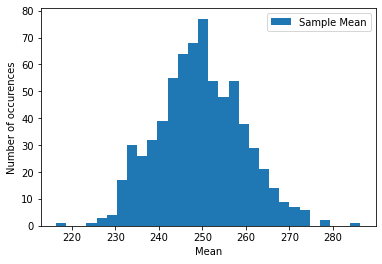

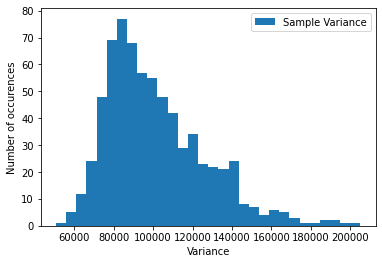

In [29]:
'''Plotting histogram of sample mean and variance for 700 generated samples'''

plt.hist(x_bar_list,bins=30, label = 'Sample Mean');
plt.xlabel('Mean')
plt.ylabel('Number of occurences')
plt.legend()
plt.show()
plt.hist(sample_var_list,bins=30, label = 'Sample Variance');
plt.xlabel('Variance')
plt.ylabel('Number of occurences')
plt.legend()
plt.show()


#### Expectation of sample variance

In [24]:
sum_1 = 0
for sample_var in sample_var_list:
    sum_1+=sample_var
exp = sum_1/len(sample_var_list)
print(exp)

101290.07993566996


The expectation of sample variance is almost equal to population variance as expected.

In [27]:
'''Here we show that as sample size increases, sample mean and variance approaches population mean and variance'''

x_bar_list_2=[]
sample_var_list_2 = []
for i_2 in range(1000):
    sam_var_temp_2=0
    sample_id_2 = mt.mt_choice(df['cust_id'], size=i_2+2, replace = False)   
    filt_2 = df['cust_id'].isin(sample_id_2)
    x_i_2 = df.loc[filt_2, 'sales_total']
    x_bar_2 = x_i_2.sum()/(i_2+2)
    x_bar_list_2.append(x_bar_2)
    for x_2 in x_i_2:        
        sam_var_temp_2+= (x_2-x_bar_2)**2
    sam_var_2 = (sam_var_temp_2/(len(x_i_2)-1))
    sample_var_list_2.append(sam_var_2)

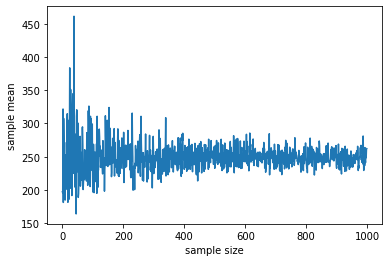

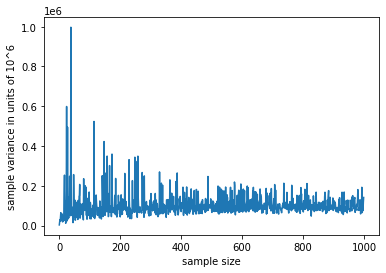

In [31]:
plt.plot([r for r in range(len(x_bar_list_2))], x_bar_list_2);
plt.xlabel('sample size')
plt.ylabel('sample mean')
plt.show()
plt.plot([s for s in range(len(sample_var_list_2))], sample_var_list_2);
plt.xlabel('sample size')
plt.ylabel('sample variance in units of 10^6')
plt.show()